In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.shape

(6435, 8)

In [4]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [5]:
df['Store'] = df['Store'].astype('O')
df['Holiday_Flag'] = df['Holiday_Flag'].astype('O')



In [6]:
df["Date"] = pd.to_datetime(df["Date"]) # convert to datetime
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month 
df['year'] =df['Date'].dt.year

In [7]:
df.dtypes

Store                   object
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag            object
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
week                     int64
month                    int64
year                     int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   object        
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   object        
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   week          6435 non-null   int64         
 9   month         6435 non-null   int64         
 10  year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 553.1+ KB


In [9]:
df_num = df.select_dtypes(np.number)
df_num.columns

Index(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'week', 'month', 'year'],
      dtype='object')

In [10]:
df_cat = df.select_dtypes('O')
df_cat.columns

Index(['Store', 'Holiday_Flag'], dtype='object')

In [11]:
df_num.describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,7.999151,26.000000,6.475524,2010.965035
std,5.643666e+05,18.444933,0.459020,39.356712,1.875885,14.511794,3.321797,0.797019
min,2.099862e+05,-2.060000,2.472000,126.064000,3.879000,1.000000,1.000000,2010.000000
25%,5.533501e+05,47.460000,2.933000,131.735000,6.891000,14.000000,4.000000,2010.000000
50%,9.607460e+05,62.670000,3.445000,182.616521,7.874000,26.000000,6.000000,2011.000000
75%,1.420159e+06,74.940000,3.735000,212.743293,8.622000,38.000000,9.000000,2012.000000
max,3.818686e+06,100.140000,4.468000,227.232807,14.313000,52.000000,12.000000,2012.000000


In [12]:
df_cat.describe()

,Store,Holiday_Flag
count,6435,6435
unique,45,2
top,1,0
freq,143,5985


<Figure size 2160x1080 with 0 Axes>

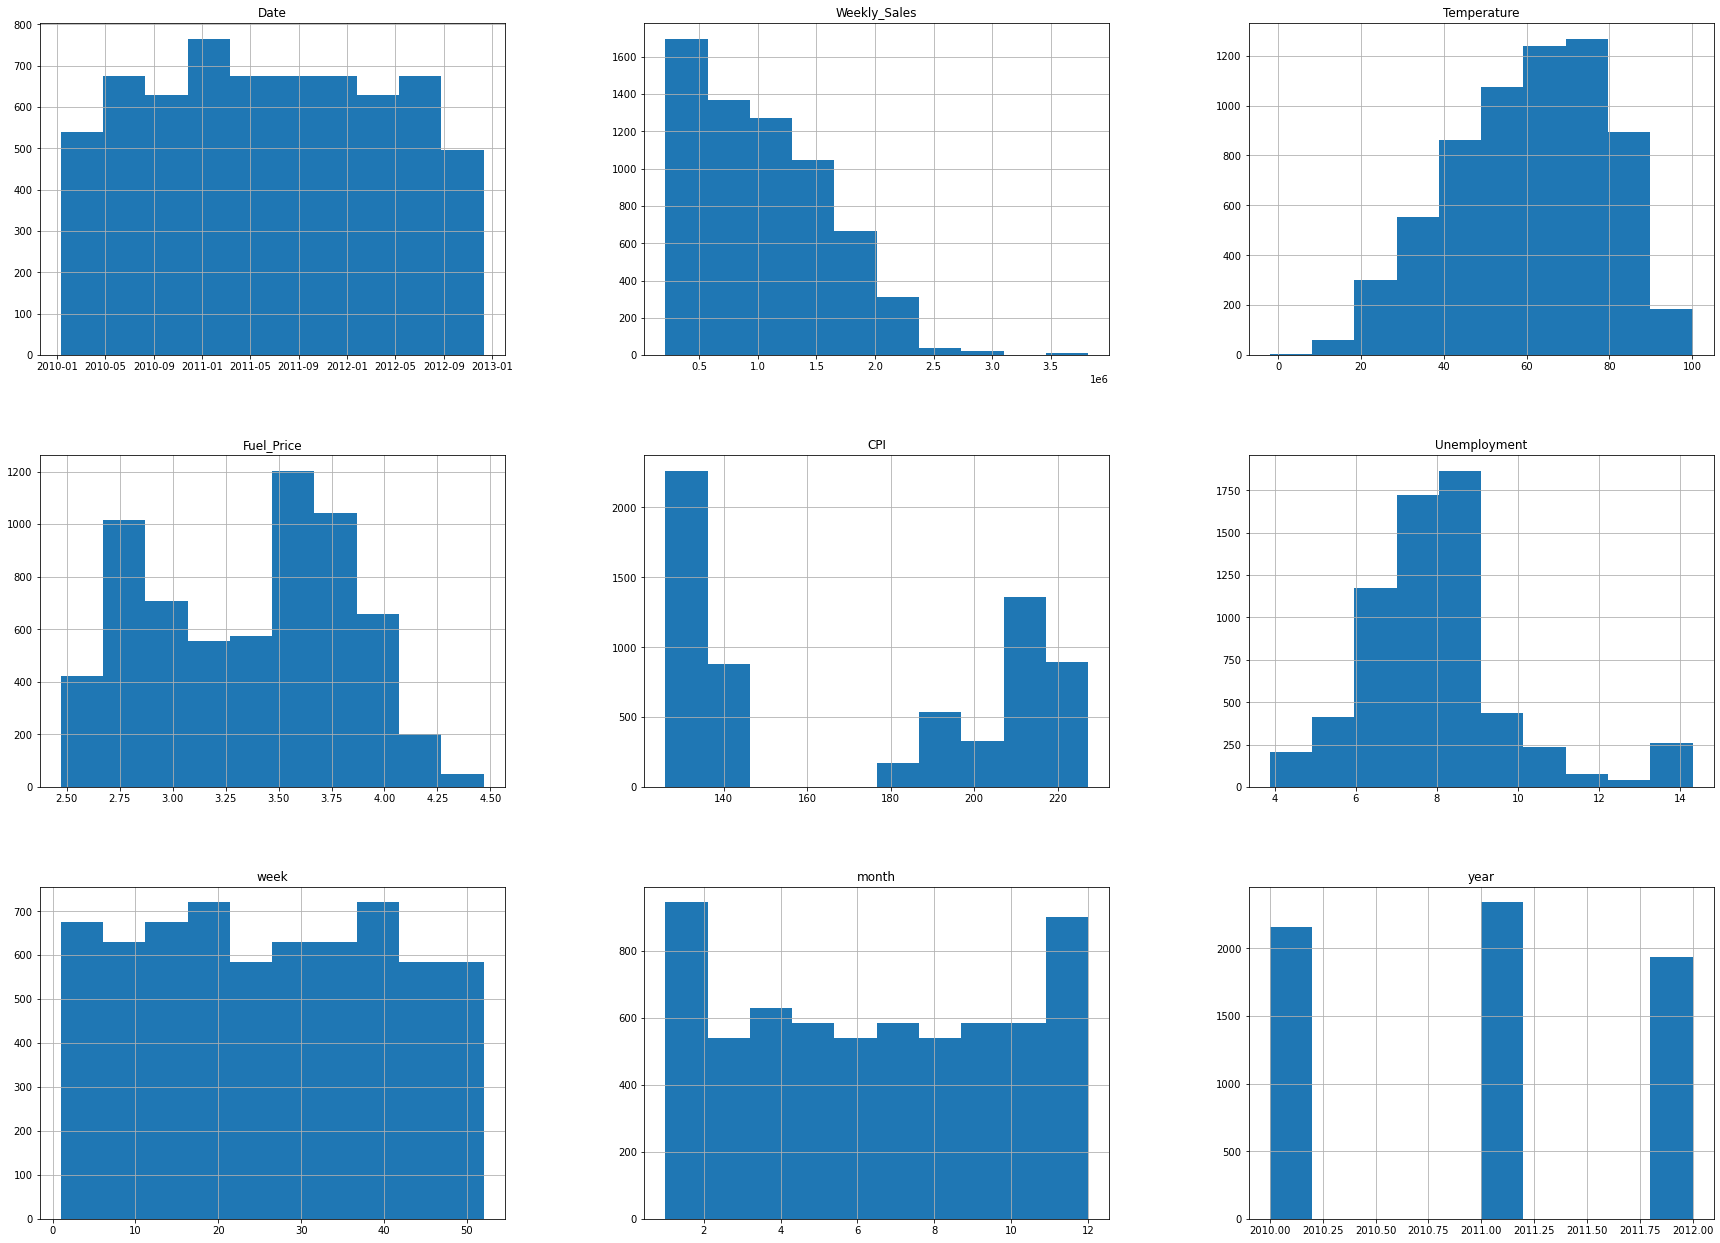

In [13]:
plt.figure(figsize = (30,15))
df.hist(figsize = (30,22))

plt.show()

In [14]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
week            0
month           0
year            0
dtype: int64

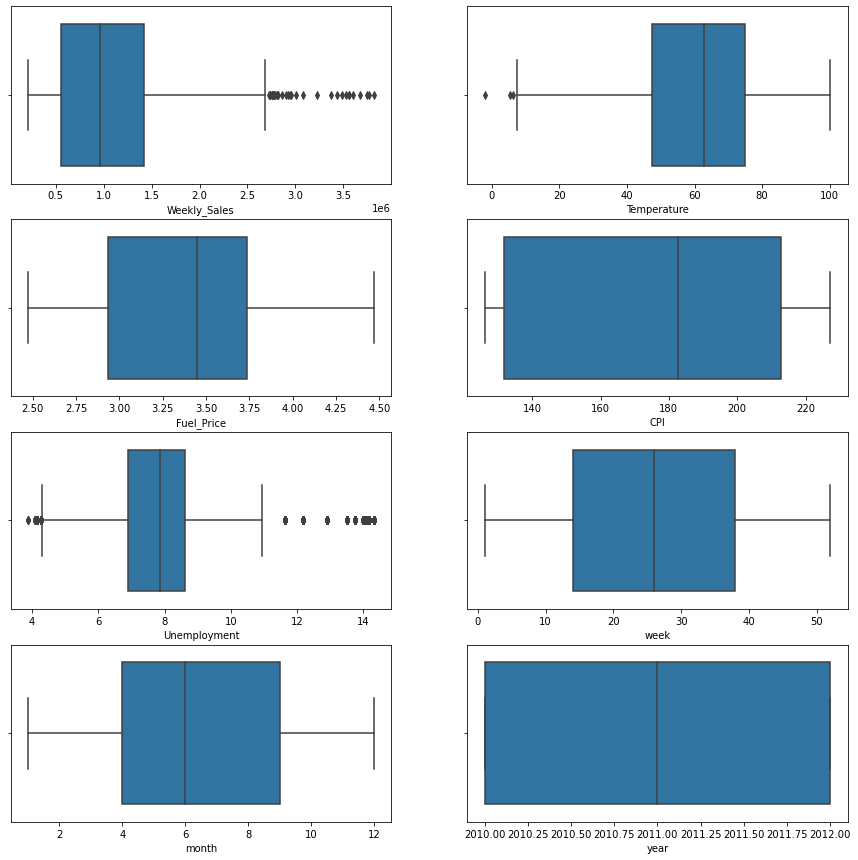

In [15]:
fig,ax = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))

for i,j in zip(df_num.columns,ax.flatten()):
    sns.boxplot(df_num[i],ax = j)
    
plt.show()


In [16]:
df[df['year']== 2010].groupby('month')['Weekly_Sales'].mean()

month
1     9.386639e+05
2     1.064372e+06
3     1.034590e+06
4     1.021177e+06
5     1.039303e+06
6     1.055082e+06
7     1.023702e+06
8     1.025212e+06
9     9.983559e+05
10    1.027201e+06
11    1.176097e+06
12    1.198413e+06
Name: Weekly_Sales, dtype: float64

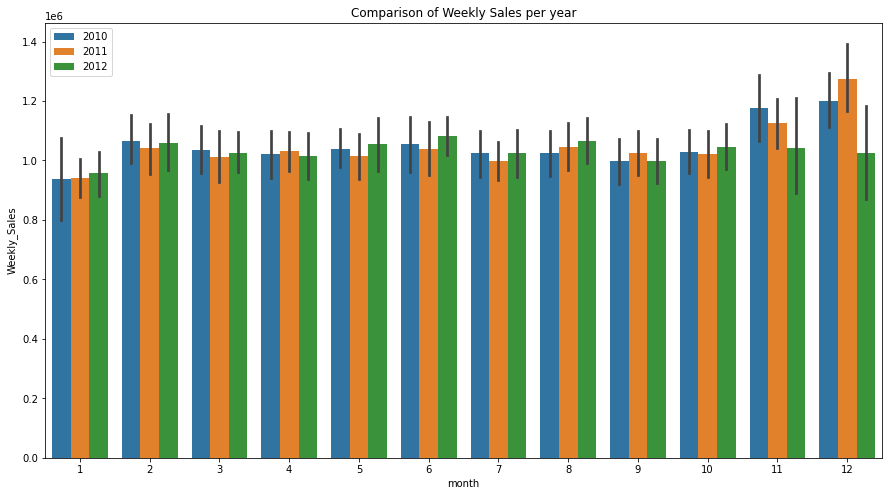

In [17]:
plt.figure(figsize = (15,8))
sns.barplot(data = df, x = 'month',y = 'Weekly_Sales',hue = 'year')
plt.legend()
plt.title('Comparison of Weekly Sales per year')
plt.show()

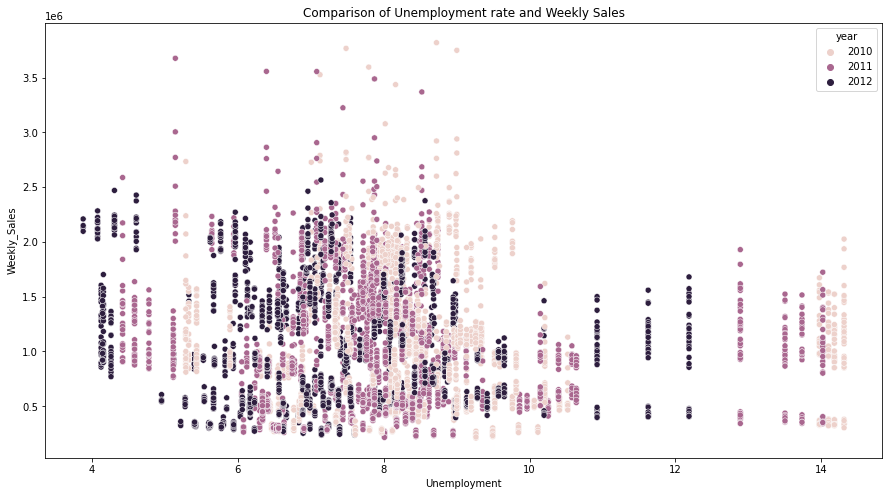

In [18]:
plt.figure(figsize = (15,8))
sns.scatterplot(data = df, x = 'Unemployment',y = 'Weekly_Sales',hue = 'year')
plt.title('Comparison of Unemployment rate and Weekly Sales')
plt.show()

No handles with labels found to put in legend.


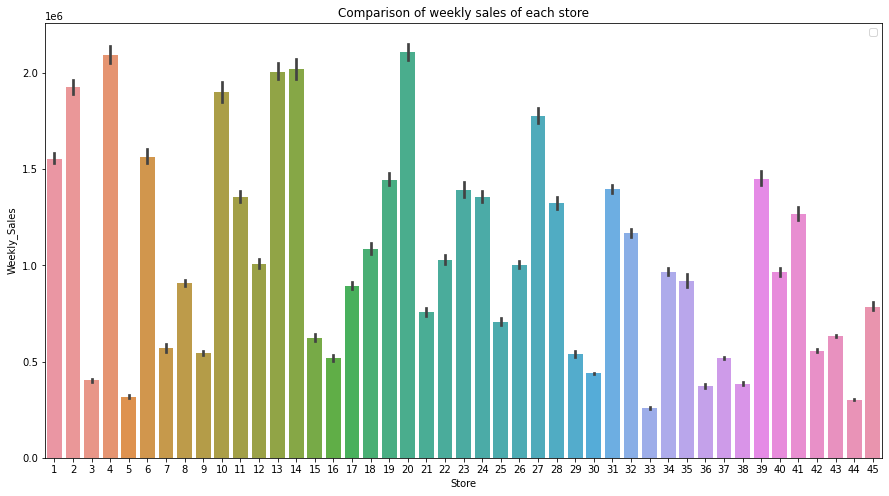

In [19]:
plt.figure(figsize = (15,8))
sns.barplot(data = df, x = 'Store',y = 'Weekly_Sales')
plt.title('Comparison of weekly sales of each store')
plt.legend()
plt.show()

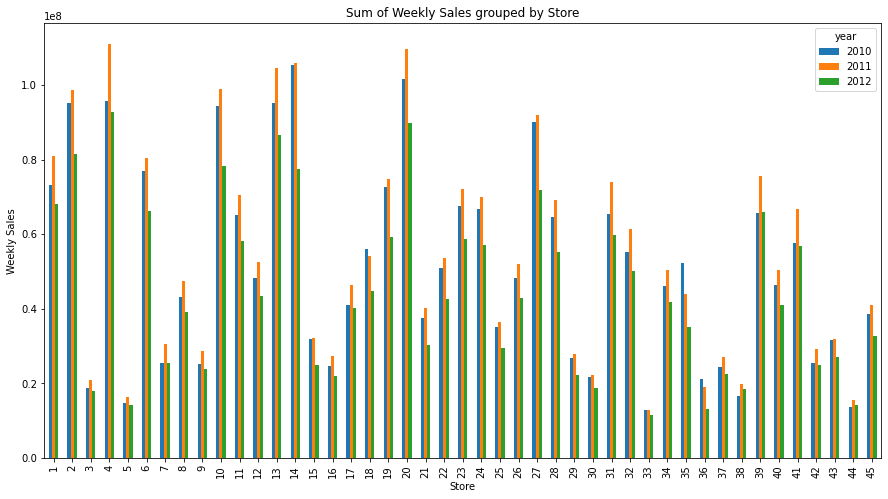

In [20]:
pd.pivot_table(data = df, index = 'Store',values = 'Weekly_Sales',
               aggfunc = np.sum,columns = 'year').plot(kind = 'bar',figsize = (15,8))

plt.title('Sum of Weekly Sales grouped by Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()

In [21]:
#Model building

In [22]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit_transform(df_num.values)

df_num = pd.DataFrame(ss,index = df_num.index,columns = df_num.columns)

df_num.describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
count,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03
mean,-5.567505e-17,2.241710e-16,-1.057257e-15,-8.880059e-16,-1.221987e-15,2.439558e-17,-1.244278e-16,1.148791e-13
std,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00
min,-1.483156e+00,-3.400861e+00,-1.931672e+00,-1.156548e+00,-2.196548e+00,-1.722871e+00,-1.648490e+00,-1.210899e+00
25%,-8.747029e-01,-7.159044e-01,-9.272803e-01,-1.012445e+00,-5.907810e-01,-8.269779e-01,-7.452945e-01,-1.210899e+00
50%,-1.527828e-01,1.087764e-01,1.882269e-01,2.804854e-01,-6.672093e-02,0.000000e+00,-1.431639e-01,4.387315e-02
75%,6.613126e-01,7.740514e-01,8.200572e-01,1.046025e+00,3.320552e-01,8.269779e-01,7.600320e-01,1.298645e+00
max,4.911589e+00,2.140386e+00,2.417063e+00,1.414212e+00,3.366059e+00,1.791785e+00,1.663228e+00,1.298645e+00


In [23]:
df = pd.concat([df_num,df_cat],axis = 1)
df.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,week,month,year,Store,Holiday_Flag
0,1.057420,-0.995136,-1.713800,1.004175,0.056964,-0.620233,-0.444229,-1.210899,1,0
1,1.054348,-1.201170,-1.766089,1.007880,0.056964,1.516126,1.663228,-1.210899,1,1
2,1.001206,-1.124178,-1.840166,1.009074,0.056964,-1.309382,-1.347425,-1.210899,1,0
3,0.642828,-0.760907,-1.737766,1.009849,0.056964,-1.240467,-1.347425,-1.210899,1,0
4,0.899914,-0.767955,-1.598328,1.010624,0.056964,-0.551319,-0.444229,-1.210899,1,0


In [24]:
df = df.drop(['week','month','year','Store'],axis = 1)
df.shape

(6435, 6)

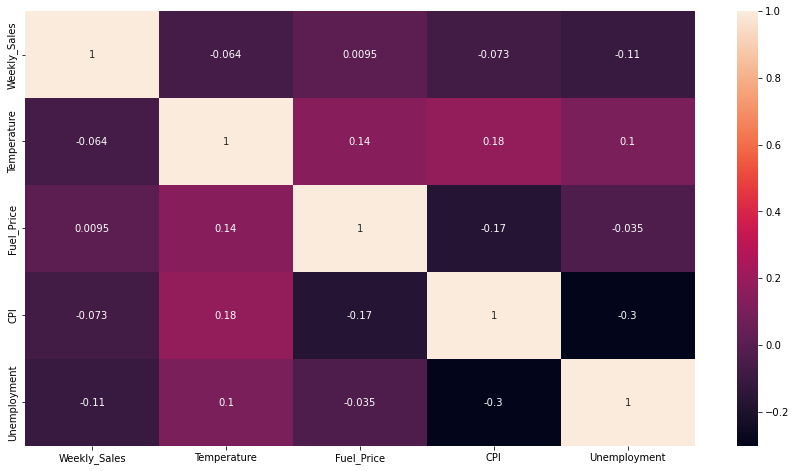

In [25]:
plt.figure(figsize = (15,8))

sns.heatmap(df.corr(),annot = True)

plt.show()

In [26]:
x = df.drop('Weekly_Sales',axis = 1)
y = df['Weekly_Sales']

x = pd.get_dummies(x,drop_first = True)



In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

linreg = LinearRegression()

model = linreg.fit(x_train,y_train)
y_pred = model.predict(x_test)




In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


print('Mean Square Error = ',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error = ',mean_absolute_error(y_test,y_pred))
print('Root Mean Square Error = ',np.sqrt(mean_absolute_error(y_test,y_pred)))

Mean Square Error =  1.009605988763525
Mean Absolute Error =  0.8424950315580015
Root Mean Square Error =  0.9178752810474861


In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge(random_state = 1)

model_ridge = ridge.fit(x_train,y_train)

y_pred_r = model_ridge.predict(x_test)


print('Mean Square Error = ',mean_squared_error(y_test,y_pred_r))
print('Mean Absolute Error = ',mean_absolute_error(y_test,y_pred_r))
print('Root Mean Square Error = ',np.sqrt(mean_absolute_error(y_test,y_pred_r)))

Mean Square Error =  1.0096115232098586
Mean Absolute Error =  0.8424966606199508
Root Mean Square Error =  0.9178761684562634


In [31]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state = 1)

model_dtc = tree.fit(x_train,y_train)

y_pred_dtc = model_dtc.predict(x_test)

print('Mean Square Error = ',mean_squared_error(y_test,y_pred_dtc))
print('Mean Absolute Error = ',mean_absolute_error(y_test,y_pred_dtc))
print('Root Mean Square Error = ',np.sqrt(mean_absolute_error(y_test,y_pred_dtc)))


Mean Square Error =  1.2780513869836367
Mean Absolute Error =  0.7582229575048693
Root Mean Square Error =  0.8707599884611542


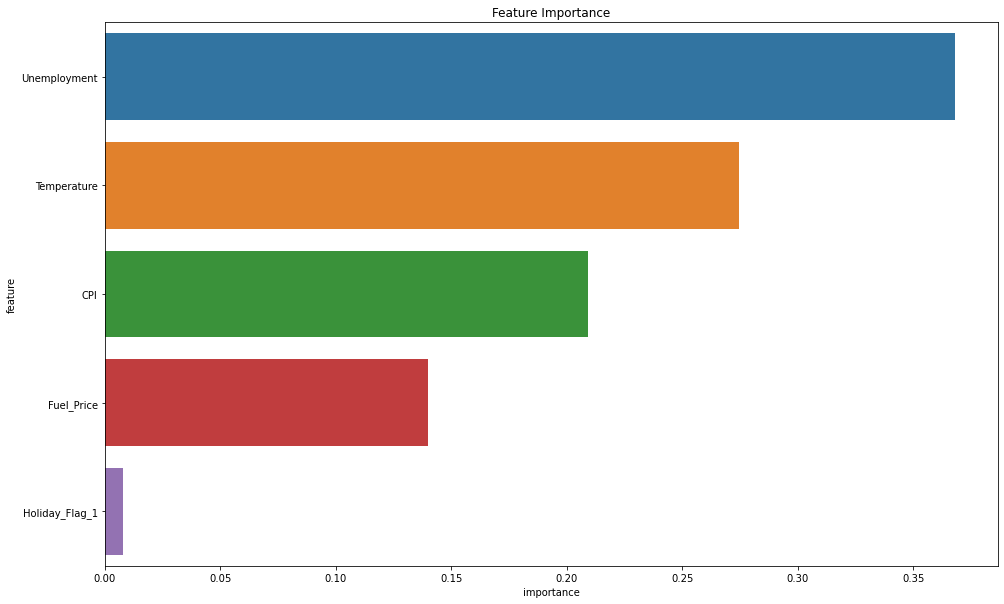

In [32]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model_dtc.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 1)

model_rf = rf.fit(x_train,y_train)

y_pred_rf = model_rf.predict(x_test)



In [35]:
print('Mean Square Error = ',mean_squared_error(y_test,y_pred_rf))
print('Mean Absolute Error = ',mean_absolute_error(y_test,y_pred_rf))
print('Root Mean Square Error = ',np.sqrt(mean_absolute_error(y_test,y_pred_rf)))

Mean Square Error =  0.9145627270361619
Mean Absolute Error =  0.6979770408819427
Root Mean Square Error =  0.8354502025147535


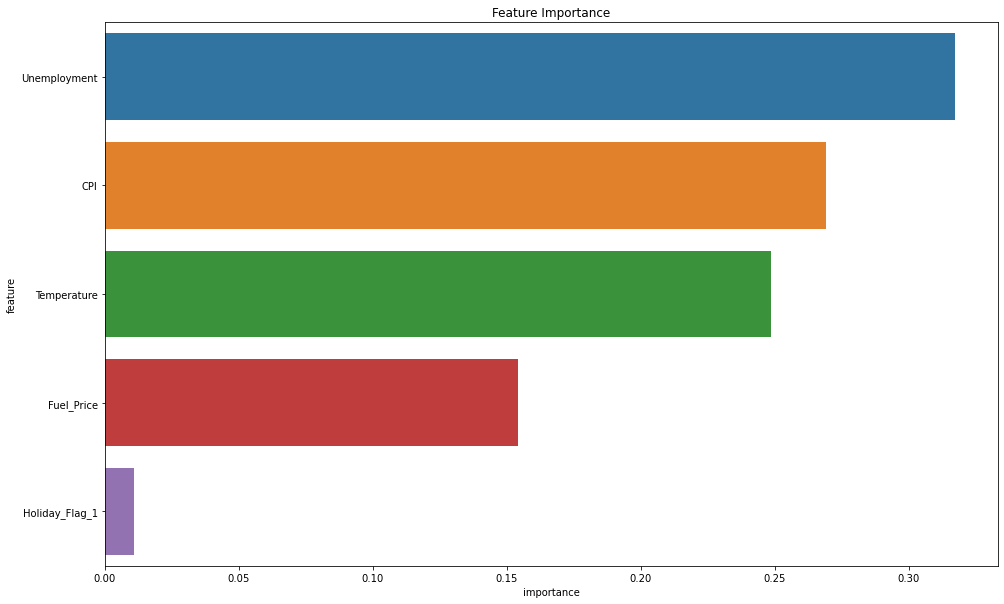

In [36]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model_rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

In [37]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state = 1)

model_x = xgb.fit(x_train,y_train)

y_pred_x = model_x.predict(x_test)


In [38]:
print('Mean Square Error = ',mean_squared_error(y_test,y_pred_x))
print('Mean Absolute Error = ',mean_absolute_error(y_test,y_pred_x))
print('Root Mean Square Error = ',np.sqrt(mean_absolute_error(y_test,y_pred_x)))

Mean Square Error =  0.8475191462449279
Mean Absolute Error =  0.6948338073224242
Root Mean Square Error =  0.8335669183229527


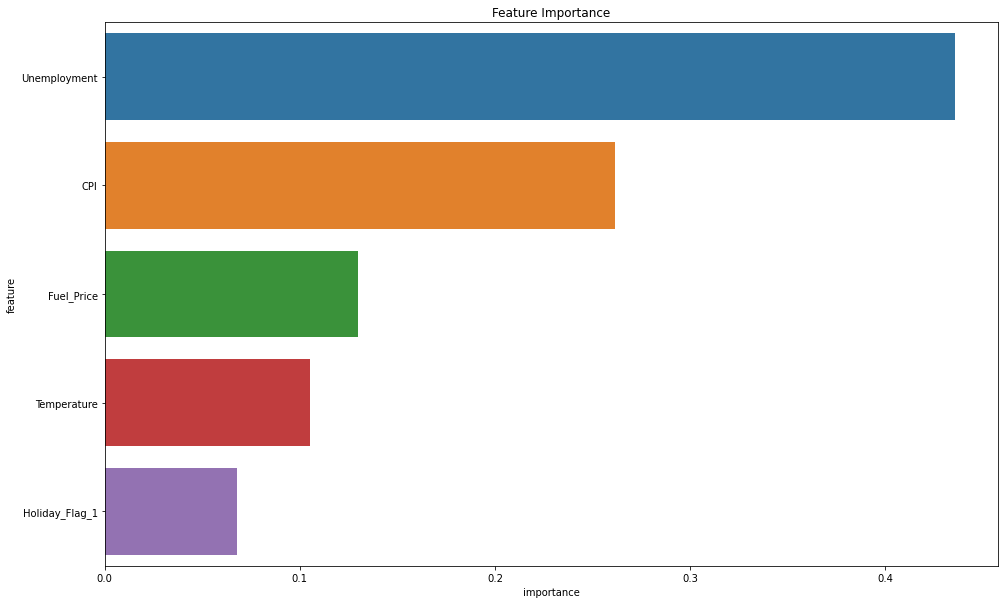

In [39]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model_x.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

In [47]:
comparison = pd.DataFrame(data = [['Linear Regression',1.00,0.84,0.91],['Ridge Regression',1.00,0.84,0.91],
                                  ['Decision Tree Regressor',1.27,0.75,0.87],['Random Forest Regresson',0.91,0.69,0.83],['XGB Regressor',0.84,0.69,0.83]],
                          columns = ['Algorithm Name','Mean Square error','Mean Absolute error','Root Mean Square error'])
comparison = comparison.set_index('Algorithm Name')

comparison

,Mean Square error,Mean Absolute error,Root Mean Square error
Algorithm Name,,,
Linear Regression,1.00,0.84,0.91
Ridge Regression,1.00,0.84,0.91
Decision Tree Regressor,1.27,0.75,0.87
Random Forest Regresson,0.91,0.69,0.83
XGB Regressor,0.84,0.69,0.83


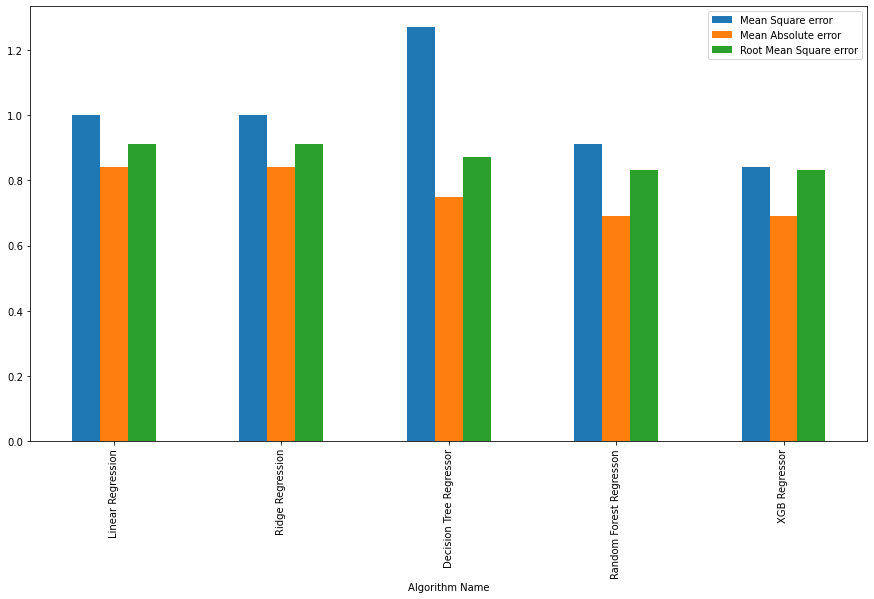

In [48]:
comparison.plot(kind = 'bar',figsize = (15,8))
plt.legend()
plt.show()